<a href="https://colab.research.google.com/github/9bishal/Learning-Tensorflow/blob/main/Introduction_to_Computer_Vision_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Convolutional Neural Network and Computer vision with tensorflow


Computer vision is practice of writing algorithm which can discover patterns in visiual data. Such as the camera of the self-driving car recognizing the car in front

##Get the data

The image we are working with are from food101 dataset(101 different classes of food)

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
#unzip the downloaded file
zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2025-02-26 03:44:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.207, 74.125.197.207, 74.125.135.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   173MB/s    in 0.6s    

2025-02-26 03:44:55 (173 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



##Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.




In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [5]:
import os
#Walk through pizza_stake directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' .")

There are 2 directories and 0 images in 'pizza_steak' .
There are 2 directories and 0 images in 'pizza_steak/test' .
There are 0 directories and 250 images in 'pizza_steak/test/pizza' .
There are 0 directories and 250 images in 'pizza_steak/test/steak' .
There are 2 directories and 0 images in 'pizza_steak/train' .
There are 0 directories and 750 images in 'pizza_steak/train/pizza' .
There are 0 directories and 750 images in 'pizza_steak/train/steak' .


In [6]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Feb 26 03:44 .
drwxr-xr-x 1 root root 4096 Feb 26 03:44 ..
drwxr-xr-x 4 root root 4096 Feb 26 03:44 test
drwxr-xr-x 4 root root 4096 Feb 26 03:44 train


In [7]:
#another way to find out the total number of images in the file
num_steak_images_train=len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visulaize our images, first let's get the class names programteically

In [8]:
#get the classnames programteically
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names=class_names[:]
print(class_names)

['pizza' 'steak']


In [9]:
#let's visulaize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #setup the target directory (we'll view images friom here)
  target_folder=target_dir+target_class

  #get a random image path
  random_image=random.sample(os.listdir(target_folder),1)
  print(random_image)


  #read in the image and plot it using matplotlib
  img=mpimg.imread(target_folder+ "/" +random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") #show the shape of the image
  return img


['3704103.jpg']
Image shape: (512, 512, 3)


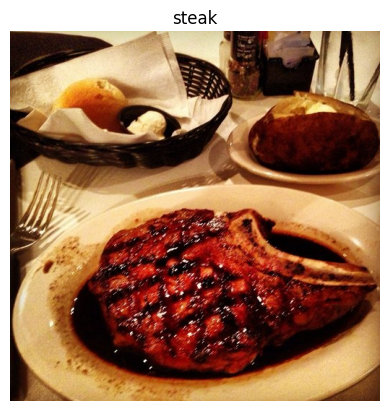

In [10]:
#view a random  image from the training dataset
img=view_random_image(target_dir="pizza_steak/train/",target_class="steak")#we even can try for "pizza"

In [11]:
#the images are converted in to the tensor with the different pixel vlaues

import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[103,  73,  45],
        [108,  78,  50],
        [113,  83,  55],
        ...,
        [158, 126,  75],
        [156, 124,  73],
        [164, 132,  81]],

       [[ 63,  33,   7],
        [ 68,  38,  12],
        [ 69,  39,  13],
        ...,
        [166, 134,  83],
        [161, 129,  78],
        [165, 133,  82]],

       [[ 49,  21,   0],
        [ 53,  25,   3],
        [ 53,  25,   3],
        ...,
        [177, 145,  94],
        [170, 138,  87],
        [172, 140,  89]],

       ...,

       [[ 15,   4,   0],
        [ 15,   4,   0],
        [ 18,   4,   1],
        ...,
        [ 68,  32,  10],
        [ 67,  32,  10],
        [ 69,  34,  12]],

       [[ 16,   5,   0],
        [ 16,   5,   0],
        [ 20,   7,   1],
        ...,
        [ 74,  38,  16],
        [ 74,  39,  17],
        [ 77,  42,  20]],

       [[ 17,   6,   0],
        [ 18,   7,   1],
        [ 21,   8,   2],
        ...,
        [ 72,  36,  1

In [12]:
#view the image shape
img.shape #returns width, height and colour channels

(512, 512, 3)

In [13]:
#get all the pixel between 0 and 1
img/255

array([[[0.40392157, 0.28627451, 0.17647059],
        [0.42352941, 0.30588235, 0.19607843],
        [0.44313725, 0.3254902 , 0.21568627],
        ...,
        [0.61960784, 0.49411765, 0.29411765],
        [0.61176471, 0.48627451, 0.28627451],
        [0.64313725, 0.51764706, 0.31764706]],

       [[0.24705882, 0.12941176, 0.02745098],
        [0.26666667, 0.14901961, 0.04705882],
        [0.27058824, 0.15294118, 0.05098039],
        ...,
        [0.65098039, 0.5254902 , 0.3254902 ],
        [0.63137255, 0.50588235, 0.30588235],
        [0.64705882, 0.52156863, 0.32156863]],

       [[0.19215686, 0.08235294, 0.        ],
        [0.20784314, 0.09803922, 0.01176471],
        [0.20784314, 0.09803922, 0.01176471],
        ...,
        [0.69411765, 0.56862745, 0.36862745],
        [0.66666667, 0.54117647, 0.34117647],
        [0.6745098 , 0.54901961, 0.34901961]],

       ...,

       [[0.05882353, 0.01568627, 0.        ],
        [0.05882353, 0.01568627, 0.        ],
        [0.07058824, 0

##An end to end example
Let's build a convulational neural network to find patterns in our imags, more specifically we a need way to:

*Load our Image

*Preprocess our images

*Build a CNN to find patterns in our images

*Compile our CNN

*Fit the CNN to our training data

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#set the seed
tf.random.set_seed(42)
#Preprocess data (get all of the pixels values between 0 & 1, also called as scalling/normalization)
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

#set up paths to our data directories
test_dir="/content/pizza_steak/test"
train_dir="/content/pizza_steak/train"
#import data from directory and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

#Build a CNN model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

#compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1=model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 278ms/step - accuracy: 0.6105 - loss: 0.6492 - val_accuracy: 0.7060 - val_loss: 0.5374
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step - accuracy: 0.7692 - loss: 0.4998 - val_accuracy: 0.8440 - val_loss: 0.3684
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - accuracy: 0.8343 - loss: 0.3745 - val_accuracy: 0.8680 - val_loss: 0.3587
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 125ms/step - accuracy: 0.8461 - loss: 0.3686 - val_accuracy: 0.8420 - val_loss: 0.3581
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - accuracy: 0.8781 - loss: 0.3098 - val_accuracy: 0.8580 - val_loss: 0.3343


In [15]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

##Using the same model as Before


In [16]:
tf.random.set_seed(42)

model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2=model_2.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 147ms/step - accuracy: 0.5099 - loss: 1.0012 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.4980 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.5026 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.4992 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.4951 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly... Let's try to improve it.

In [17]:
#improving the accuracy of the model

tf.random.set_seed(42)
model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3=model_3.fit(train_data, #training dataset
                      epochs=5,  #train for 5 passes over the dataset
                      steps_per_epoch=len(train_data), #number of batches per epochs
                      validation_data=valid_data,  #validation dataset
                      validation_steps=len(valid_data) #number of validation batches
)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 152ms/step - accuracy: 0.5701 - loss: 8.0386 - val_accuracy: 0.6100 - val_loss: 1.7879
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.6927 - loss: 1.2547 - val_accuracy: 0.7480 - val_loss: 0.5741
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.7366 - loss: 0.6578 - val_accuracy: 0.7020 - val_loss: 0.6982
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.7512 - loss: 0.5759 - val_accuracy: 0.7760 - val_loss: 0.4441
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.8216 - loss: 0.4255 - val_accuracy: 0.8080 - val_loss: 0.4316


In [18]:
#getting the summary of model_3
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

##Binary classification let's break it down

1. Become one with the data(visualize, visualize, visualize)

2. Preprocess the data (prepared it for model, the main step here was scaling/normalizing & turning our data into batches)

3. Created a model (start with a baseline)

4. fit the model

5. Evaluate the model

6. Adjust different parameters and improve the model( try to beat our baseline)

7. Repeat until satisfied
 (experiment, experiment, experiment)

##1. Become one with the data

['43924.jpg']
Image shape: (384, 512, 3)
['3391208.jpg']
Image shape: (512, 341, 3)


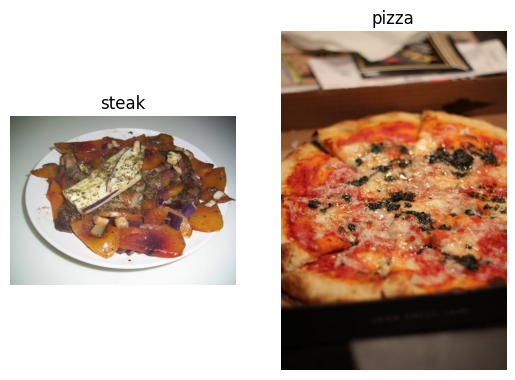

In [19]:
#visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image(target_dir="pizza_steak/train/",target_class="steak")
plt.subplot(1,2,2)
pizza_img=view_random_image(target_dir="pizza_steak/train/",target_class="pizza")

##2. Preprocess the data (prepare it for a model)

In [20]:
#define directory datset paths
train_dir="/content/pizza_steak/train"
test_dir="/content/pizza_steak/test"

Our next step is to turn our data into **batches.**
A batch is a small subset of data. Rather than a look at all ~10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
  1. 10,000 images (or more) might not fit into the memory of your preocessor(GPU)
  2. Trying to learn the patterns in 10,000 images at one hit could result in the model not being able to learn very well.

In [21]:
#create train and test data generator and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalizes pixel values (0-255 → 0-1) for better model performance

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [22]:
#load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, #target directory of images
                                               target_size=(224, 224), #target size of images
                                               class_mode ="binary",  #type of data you are working with
                                               batch_size=32) #size of minibatches to load data into

test_data=  test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [23]:
#get the sample of a train data batch
images, labels = next(train_data)  #fetches one batch (e.g., 32 images & labels if batch_size=32).
len(images), len(labels)           #It confirms that the batch contains 32 images and 32 labels.

(32, 32)

In [24]:
len(train_data)

47

In [25]:
1500/32

46.875

In [26]:
#getting the first two images
images[:2], images[0].shape

(array([[[[0.56078434, 0.63529414, 0.79215693],
          [0.5647059 , 0.6392157 , 0.7960785 ],
          [0.5647059 , 0.6392157 , 0.80392164],
          ...,
          [0.07843138, 0.08235294, 0.05882353],
          [0.08235294, 0.08235294, 0.07450981],
          [0.09803922, 0.09803922, 0.09803922]],
 
         [[0.5647059 , 0.6392157 , 0.7960785 ],
          [0.5568628 , 0.6313726 , 0.7960785 ],
          [0.5568628 , 0.6313726 , 0.7960785 ],
          ...,
          [0.09803922, 0.10196079, 0.07058824],
          [0.0627451 , 0.06666667, 0.04705883],
          [0.04313726, 0.04313726, 0.03529412]],
 
         [[0.5686275 , 0.6431373 , 0.8078432 ],
          [0.5647059 , 0.6392157 , 0.80392164],
          [0.5647059 , 0.6392157 , 0.8078432 ],
          ...,
          [0.07450981, 0.07843138, 0.04705883],
          [0.15686275, 0.16078432, 0.13725491],
          [0.21568629, 0.21960786, 0.20000002]],
 
         ...,
 
         [[0.3921569 , 0.34901962, 0.22352943],
          [0.39607

In [27]:
images[8].shape

(224, 224, 3)

###3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you steup when begining a machine learning experminet and then you keep experimenting, you try to beat baseline

##Main Features of Conv2D (2D Convolutional Layer)

The Conv2D layer is the core building block of Convolutional Neural Networks (CNNs). It is used to detect features (edges, textures, shapes, etc.) in images by applying filters/kernels.

In [28]:
#making the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [29]:
#create the model (this will be our baseine, a layer convulational neural netweork)
model_4 = Sequential([

    #1. these are used to extract the features
    Conv2D(filters=10, #Uses 10 filters (learns 10 different feature maps).
           kernel_size=3,#Kernel size = 3×3 (small sliding window scanning the image)
           strides=1,#Stride = 1 (moves 1 pixel at a time).
           padding="valid", #Padding = "valid" (no padding, output size shrinks).
          #  padding="same", #if same, then output shaoe is same as input shape
           activation="relu",
           input_shape=(224, 224,3)), #Takes input images of shape (224, 224, 3) (RGB images)

    #2. these are used to extract the features
    Conv2D(10,3, activation="relu"), #Activation = "relu" (introduces non-linearity for better feature extraction).
    Conv2D(10,3, activation="relu"),

    #organising the feature
    Flatten(), #Converts the multi-dimensional feature map into a 1D array.

    #Makes a decision
    Dense(1, activation='sigmoid') #Sigmoid activation → Outputs a probability (0 to 1)
])

In [30]:
#co pile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [31]:
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 218, 218, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 475240)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │         475,241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 477,341 (1.82 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

##4. Fit the model

In [32]:
#check the length of training and test data generattor
len(train_data), len(test_data)

(47, 16)

In [33]:
#fit the model
history_4=model_4.fit(
    train_data,
    epochs=5, # Number of times the model will see the entire dataset
    steps_per_epoch=len(train_data), # Number of batches per epoch
    validation_data=test_data, # Data to check model performance
    validation_steps=len(test_data) # Number of validation batches per epoch
)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 185ms/step - accuracy: 0.6018 - loss: 0.7069 - val_accuracy: 0.8260 - val_loss: 0.3982
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 109ms/step - accuracy: 0.8367 - loss: 0.3778 - val_accuracy: 0.8640 - val_loss: 0.3619
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step - accuracy: 0.9027 - loss: 0.2736 - val_accuracy: 0.8140 - val_loss: 0.4172
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - accuracy: 0.9540 - loss: 0.1715 - val_accuracy: 0.8380 - val_loss: 0.3584
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.9858 - loss: 0.0608 - val_accuracy: 0.8380 - val_loss: 0.4030


##5. Evaluating our model

It looks like our model is learning something

In [34]:
model_4.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.8408 - loss: 0.4148


[0.40301182866096497, 0.8379999995231628]

<Axes: >

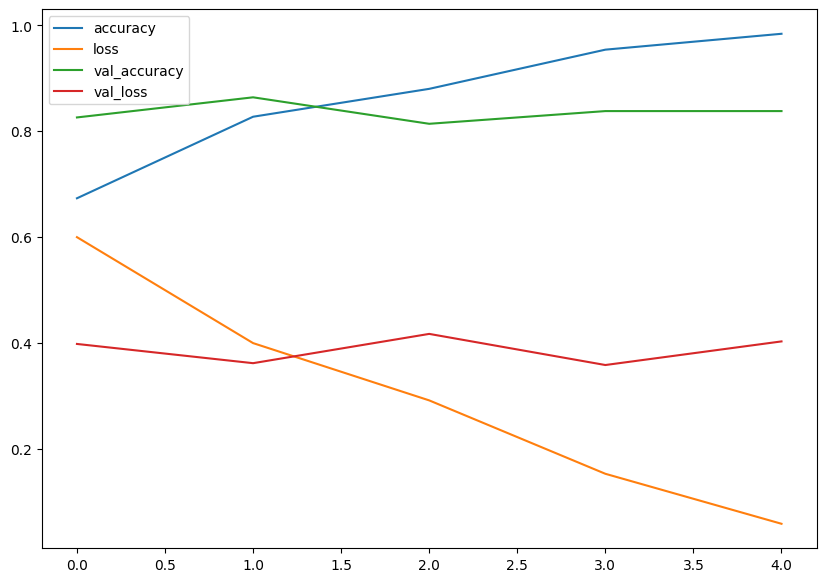

In [35]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [36]:
#plot the validation and training curves seperately
def plot_loss_curves(history):
  loss=history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]
#plot the loss
  epochs = range(len(history.history["loss"]))
  plt.plot(epochs, loss, label="training_data")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.xlabel("epochs")
  plt.ylabel("loss")
  plt.legend()

  #plot accuracy
  plt.figure()
  epochs = range(len(history.history["accuracy"]))
  plt.plot(epochs, accuracy, label="training_data")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.ylabel("accuracy")
  plt.xlabel("epochs")
  plt.legend()


Note: When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset too well and thus the model's ability to generalize to unseen data will be dismissed.

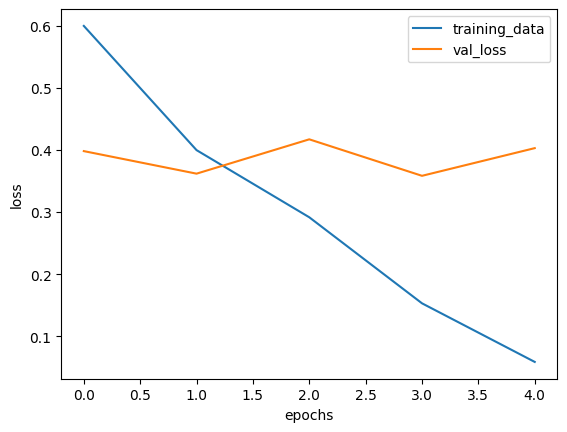

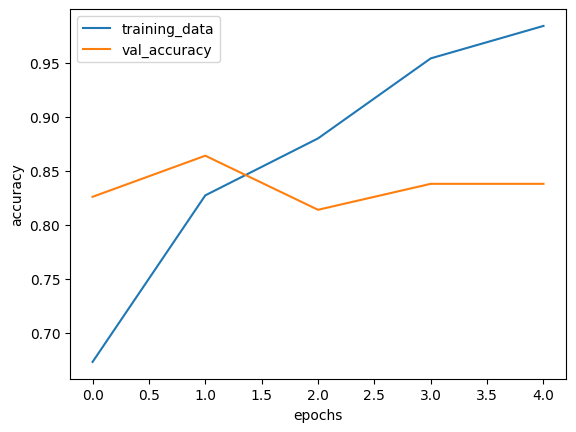

In [37]:
#chech out the loss and accuracy
plot_loss_curves(history_4)

###6. Adjust the model

Fitting a machine learning model comes in 3 steps

  0. Create a baseline
  1. Beast the baseline by overfitting a larger model_1
  2. Reduce overfitting

Ways to induce overfitting
* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layers

Reduce overfitting
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data....
**Note** :Reducing overfitting is also known as **regulation**

In [38]:
#create a model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(filters=10,kernel_size= 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),#Reduces image size (by taking the largest value in a 2×2 area)
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
#let's compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [40]:
history_5 =model_5.fit(train_data,
                         epochs=5,
                         steps_per_epoch=len(train_data),
                         validation_data=test_data,
                         validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 164ms/step - accuracy: 0.6297 - loss: 0.6329 - val_accuracy: 0.7640 - val_loss: 0.4760
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - accuracy: 0.7873 - loss: 0.4889 - val_accuracy: 0.8540 - val_loss: 0.3634
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.8139 - loss: 0.4315 - val_accuracy: 0.8680 - val_loss: 0.3321
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.8294 - loss: 0.3817 - val_accuracy: 0.8520 - val_loss: 0.3425
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - accuracy: 0.8429 - loss: 0.3654 - val_accuracy: 0.8560 - val_loss: 0.3354


In [41]:
model_5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │           6,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

In [42]:
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 218, 218, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 475240)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │         475,241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,432,025 (5.46 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 954,684 (3.64 MB)

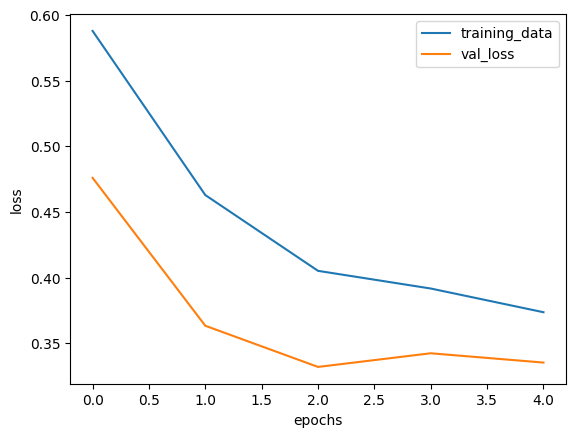

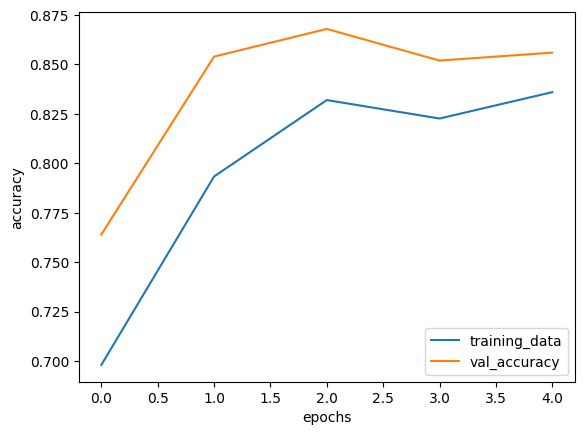

In [43]:
plot_loss_curves(history_5)

##Opening our bags of tricks and finding data augmentation

In [44]:
#Create ImageDataGenreator training instance with data augmentation

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range = 0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)
#create imageDataGenerator without data augmnetation
train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen =  ImageDataGenerator(rescale=1/255.)

###Question:  What is Data Augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our model to learn more generalize (hopefullly) patterns. Altering might mean adjusting the rotation of an image, flipping it, croping ot or something similar.

Let's write some code to visulaize data augmentation.

In [45]:
#import data and augment it from training directory
print("Augmented training Data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                      target_size=(224, 224),
                                                                      batch_size=32,
                                                                      class_mode = "binary",
                                                                      shuffle = False)
#create non-augmented train data batches
print("Non- Augmented training data: ")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode = "binary",
                                               shuffle = False)

#create non-augmented test data batches
print("Non- Augmented training data: ")
test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode = "binary",
)


Augmented training Data
Found 1500 images belonging to 2 classes.
Non- Augmented training data: 
Found 1500 images belonging to 2 classes.
Non- Augmented training data: 
Found 500 images belonging to 2 classes.


# Data Augmentation (CNNs)

Data augmentation enhances dataset diversity by applying transformations like rotation, flipping, zooming, and shifting. These techniques improve model generalization, reduce overfitting, and make models more robust to real-world variations. It is especially useful for small datasets, as it virtually increases their size. Common methods include rotating images at random angles, flipping them horizontally or vertically, zooming in or out, shifting positions, and adjusting brightness. Overall, data augmentation boosts accuracy and ensures better deep learning performance.



Let's visualize some augmented data

In [46]:
#get the sample data batches
images, labels = next(train_data)
augmented_images, augmented_labels = next(train_data_augmented)

Showing image number: 4


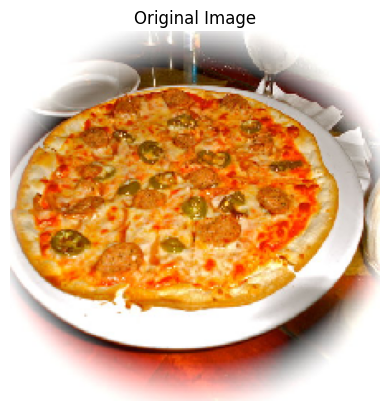

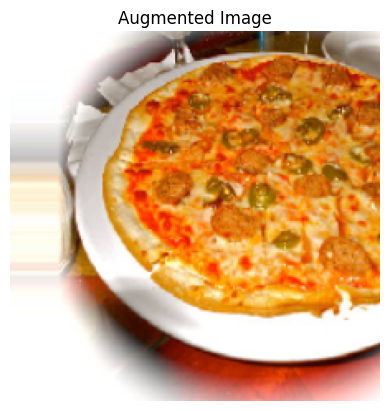

In [47]:
#show original images and augmented image
import random
random_number = random.randint(0,32) #our batches size
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False);

plt.figure()

plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False);

In [48]:
#create a model (same as model 5)
model_6 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3,activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="relu")
])

model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

#fit the model
history_6=model_4.fit(
    train_data_augmented,
    epochs=5, # Number of times the model will see the entire dataset
    steps_per_epoch=len(train_data_augmented), # Number of batches per epoch
    validation_data=test_data, # Data to check model performance
    validation_steps=len(test_data) # Number of validation batches per epoch
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 413ms/step - accuracy: 0.6767 - loss: 0.8064 - val_accuracy: 0.7100 - val_loss: 0.5634
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 405ms/step - accuracy: 0.6156 - loss: 0.7060 - val_accuracy: 0.7680 - val_loss: 0.5041
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 425ms/step - accuracy: 0.7044 - loss: 0.6313 - val_accuracy: 0.7780 - val_loss: 0.4759
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 428ms/step - accuracy: 0.6870 - loss: 0.5843 - val_accuracy: 0.6460 - val_loss: 0.6326
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 404ms/step - accuracy: 0.5629 - loss: 0.7200 - val_accuracy: 0.7000 - val_loss: 0.5595


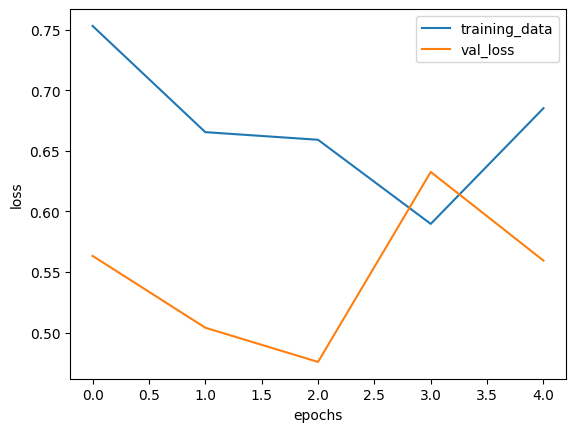

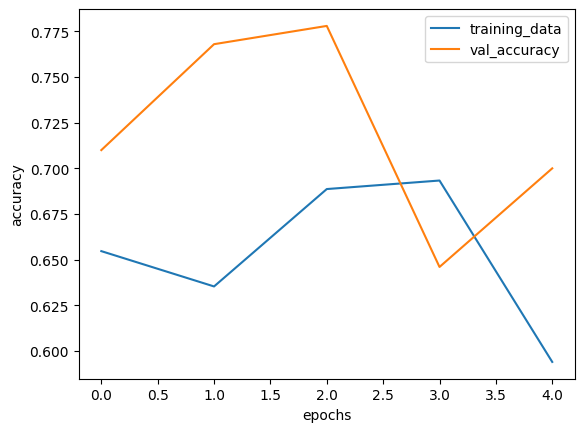

In [50]:
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model(the same as before) on it and see what happpens


In [54]:
#importe sata augment it and shuffle from traininga directory
train_data_augmented_shuffle = train_datagen_augmented.flow_from_directory(train_dir,
                                                                           target_size=(224, 224),
                                                                           class_mode ="binary",
                                                                           batch_size=32,
                                                                           shuffle=True)

Found 1500 images belonging to 2 classes.


In [60]:
#create a model same as modle5_ and model_6
model_7 = Sequential([
    Conv2D(10, 3, activation="relu",input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_7=model_7.fit(train_data_augmented_shuffle,
              epochs=5,
              steps_per_epoch=len(train_data_augmented_shuffle),
              validation_data=test_data,
              validation_steps=len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 408ms/step - accuracy: 0.5643 - loss: 0.6739 - val_accuracy: 0.7280 - val_loss: 0.5436
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 408ms/step - accuracy: 0.7128 - loss: 0.5837 - val_accuracy: 0.8280 - val_loss: 0.4222
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 465ms/step - accuracy: 0.7532 - loss: 0.5242 - val_accuracy: 0.7980 - val_loss: 0.4345
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 392ms/step - accuracy: 0.7698 - loss: 0.4968 - val_accuracy: 0.8520 - val_loss: 0.3741
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 408ms/step - accuracy: 0.7655 - loss: 0.4943 - val_accuracy: 0.8580 - val_loss: 0.3931


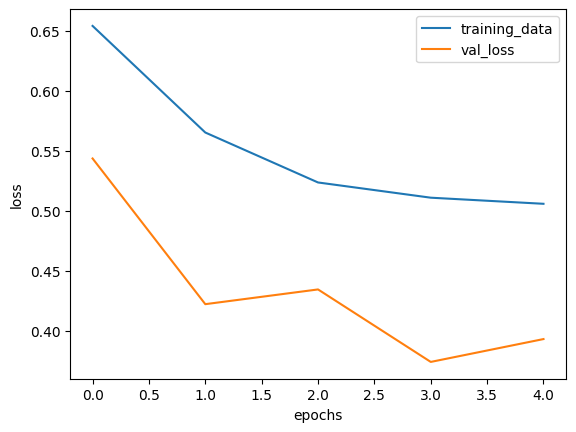

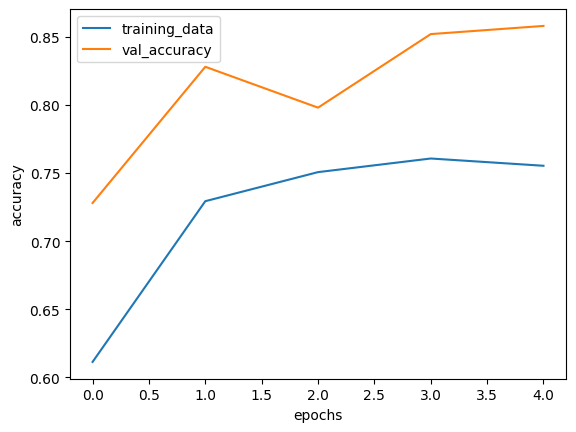

In [61]:
plot_loss_curves(history_7)

Note: When shuffling training data, the model gets expected to all different kinds of data  during training, thus enabling it to learn features across a wide range of images( in our case, pizza & steak at the same time instead of just pizza then steak)